In [9]:
pip install keras


Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install TensorFlow

  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.0
    Uninstalling importlib-metadata-3.10.0:
      Successfully uninstalled importlib-metadata-3.10.0
Note: you may need to restart the kernel to use updated packages.


## Домашнее задание 2

@ Используем набор примеров fashion-MNIST

1. Опишите - какой результата получен в нейросети в зависимости от:
    
    числа нейронов в слое(для 2-хслойной сети),
    
    числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).
    
    фиксируйте для тренировочного и тестового набора метрики accuracy.

2. Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе?

4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность). Сделайте вывод.

In [12]:
import numpy as np
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import multilabel_confusion_matrix, classification_report,  ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [13]:
(train_imagef,train_labelf),(test_imagef,test_labelf)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [14]:
print(train_imagef.shape)
print(test_imagef.shape)

(60000, 28, 28)
(10000, 28, 28)


In [15]:
train_imagef = train_imagef.reshape((-1, 784))
test_imagef = test_imagef.reshape((-1, 784))

In [16]:
train_imagef = (train_imagef / 127) - 1
test_imagef = (test_imagef / 127) - 1

In [17]:
model = Sequential([
  Dense(128, activation='tanh', input_shape=(784,)),
  Dense(110, activation='tanh'),
  Dense(100, activation='tanh'),
  Dense(10, activation='softmax'),
])


model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [18]:
model.save_weights('model.h5')

In [19]:
model.summary( )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 110)               14190     
                                                                 
 dense_2 (Dense)             (None, 100)               11100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 126,780
Trainable params: 126,780
Non-trainable params: 0
_________________________________________________________________


In [20]:
y_t = to_categorical(train_labelf)
y_tt = to_categorical(test_labelf)

In [21]:
y_t[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [23]:
# Train the model.
model.fit(    
  train_imagef[:,:],

  y_t[:,:],
  epochs=2,
  batch_size=32, validation_split=0.2
)

# Evaluate the model.
model.evaluate( 
  test_imagef,
  y_tt
)

Epoch 1/2
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3748 - accuracy: 0.8620 - val_loss: 0.4092 - val_accuracy: 0.8500
Epoch 2/2
313/313 [==============================] - 0s 1ms/step - loss: 0.4183 - accuracy: 0.8470


[0.4182687997817993, 0.847000002861023]

### 1. Опишите - какой результат получен в нейросети в зависимости от параметров

In [24]:
def grid_test_models_1(train_data, train_label, test_data, test_label, optimizer='adam' ,base_neurons=128, add_layers=0 ):
    model = Sequential()
    model.add(Dense(base_neurons, activation='tanh', input_shape=(784,)))  
    for k in range(add_layers):
        model.add(Dense(10+(10-k)*10, activation='tanh'))       
    model.add(Dense(10, activation='softmax')) 

    model.compile(
      optimizer=optimizer,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
    )  
    
    model.fit(    
      train_data[:,:],
      train_label[:,:],
      epochs=2,
      batch_size=1024, validation_split=0.2, verbose=0
    )
    
    return f'При параметрах: optimizer = {optimizer}, base_neurons = {base_neurons}, layers = {2 + add_layers} Качество: accuracy = {model.evaluate(test_data, test_label, verbose=0)[1]}'
      

#### 1.1 Числа нейронов в слое(для 2-хслойной сети)

In [25]:
num_neurons = [10,20,30,50,80,100,128,150,180,200,250,350,450,600,800,1000]
for i in num_neurons:
    print(grid_test_models_1(train_imagef, y_t, test_imagef, y_tt, base_neurons = i))

При параметрах: optimizer = adam, base_neurons = 10, layers = 2 Качество: accuracy = 0.7577000260353088
При параметрах: optimizer = adam, base_neurons = 20, layers = 2 Качество: accuracy = 0.7778000235557556
При параметрах: optimizer = adam, base_neurons = 30, layers = 2 Качество: accuracy = 0.7964000105857849
При параметрах: optimizer = adam, base_neurons = 50, layers = 2 Качество: accuracy = 0.809499979019165
При параметрах: optimizer = adam, base_neurons = 80, layers = 2 Качество: accuracy = 0.8209999799728394
При параметрах: optimizer = adam, base_neurons = 100, layers = 2 Качество: accuracy = 0.821399986743927
При параметрах: optimizer = adam, base_neurons = 128, layers = 2 Качество: accuracy = 0.8253999948501587
При параметрах: optimizer = adam, base_neurons = 150, layers = 2 Качество: accuracy = 0.8296999931335449
При параметрах: optimizer = adam, base_neurons = 180, layers = 2 Качество: accuracy = 0.8270000219345093
При параметрах: optimizer = adam, base_neurons = 200, layers =

## При увеличении числа нейронов растет и качество модели

#### 1.2 числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых параметров).

In [26]:
for i in range(11):
    print(grid_test_models_1(train_imagef, y_t, test_imagef, y_tt, add_layers=i ))

При параметрах: optimizer = adam, base_neurons = 128, layers = 2 Качество: accuracy = 0.8313000202178955
При параметрах: optimizer = adam, base_neurons = 128, layers = 3 Качество: accuracy = 0.8331000208854675
При параметрах: optimizer = adam, base_neurons = 128, layers = 4 Качество: accuracy = 0.8353999853134155
При параметрах: optimizer = adam, base_neurons = 128, layers = 5 Качество: accuracy = 0.8385999798774719
При параметрах: optimizer = adam, base_neurons = 128, layers = 6 Качество: accuracy = 0.8450000286102295
При параметрах: optimizer = adam, base_neurons = 128, layers = 7 Качество: accuracy = 0.8420000076293945
При параметрах: optimizer = adam, base_neurons = 128, layers = 8 Качество: accuracy = 0.8295999765396118
При параметрах: optimizer = adam, base_neurons = 128, layers = 9 Качество: accuracy = 0.8414000272750854
При параметрах: optimizer = adam, base_neurons = 128, layers = 10 Качество: accuracy = 0.8345000147819519
При параметрах: optimizer = adam, base_neurons = 128, 

###  При увеличении числа слоев в начале мы видим и увеличение качества модели, хотя затем наблюдается и спад 

### 2. Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

In [27]:
def grid_test_models_2(train_data, train_label, test_data, test_label, optimizer='adam'):
    model = Sequential([
      Dense(128, activation='tanh', input_shape=(784,)),
      Dense(110, activation='tanh'),
      Dense(100, activation='tanh'),
      Dense(10, activation='softmax'),
    ])
    model.load_weights('model.h5')
    model.compile(
      optimizer=optimizer,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
    )  
    
    
    model.fit(    
      train_data[:,:],
      train_label[:,:],
      epochs=2,
      batch_size=1024, validation_split=0.2, verbose=0
    )
    
    return f'При параметрах: optimizer = {optimizer}, base_neurons = {base_neurons}, layers = {2 + add_layers} Качество: accuracy = {model.evaluate(test_data, test_label, verbose=0)[1]}'
      

In [28]:
optimaizers = ['adam', 'SGD', 'RMSProp', 'Adagrad']
for i in optimaizers:
    print(grid_test_models_1(train_imagef, y_t, test_imagef, y_tt, optimizer = i))

При параметрах: optimizer = adam, base_neurons = 128, layers = 2 Качество: accuracy = 0.8282999992370605
При параметрах: optimizer = SGD, base_neurons = 128, layers = 2 Качество: accuracy = 0.7069000005722046
При параметрах: optimizer = RMSProp, base_neurons = 128, layers = 2 Качество: accuracy = 0.7906000018119812
При параметрах: optimizer = Adagrad, base_neurons = 128, layers = 2 Качество: accuracy = 0.5665000081062317


из всех опробованных оптимизаторов лучше всех проявил себя adam

#### 3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе?

Размер слоя повысил качество модели, а также оптимизатор adam

### 4.Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность). Сделайте вывод.

In [29]:
model = Sequential([
      Dense(600, activation='tanh', input_shape=(784,)),      
      Dense(10, activation='softmax'),
    ])

model.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy'],
    )  
    
    
model.fit(    
      train_imagef[:,:],
      y_t[:,:],
      epochs=35,
      batch_size=1024, validation_split=0.2, verbose=0
    )

In [30]:
model.evaluate(test_imagef, y_tt, verbose=0)[1]

0.8884999752044678

In [32]:
y_pred = model.predict(test_imagef)
y_pred_class = np.argmax(y_pred,axis=1)

313/313 [==============================] - 1s 1ms/step


In [33]:
print(classification_report(test_labelf, y_pred_class))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82      1000
           1       0.99      0.97      0.98      1000
           2       0.84      0.81      0.82      1000
           3       0.85      0.92      0.88      1000
           4       0.85      0.79      0.82      1000
           5       0.96      0.96      0.96      1000
           6       0.69      0.77      0.73      1000
           7       0.94      0.95      0.95      1000
           8       0.96      0.97      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [36]:
conf_mat = multilabel_confusion_matrix(test_labelf, y_pred_class)

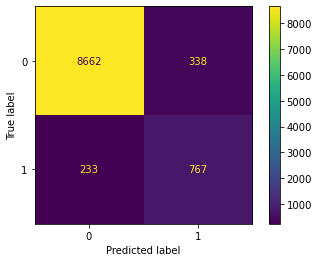

In [41]:
ConfusionMatrixDisplay(conf_mat[6]).plot()

Класс 6 определяется хуже всего